# Spaceship Titanic

Hello everyone lets go on a journey to the stars on our spaceship titanic. It gives me goosebumps to think that the mankind will be able to travel among stars in the future. Sadly our spaceship titanic met an accident because of which some passengers have to transport themselves to other dimensions. Now lets see which passengers were transported by using data science.


![](https://miro.medium.com/max/720/1*6McwTIxIKD470mUSJSXqmw.jpeg)

# Importing Libraries

In [1]:
#core 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid' , font_scale = 1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time


In [2]:
#sklearn 
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , StratifiedKFold
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score , f1_score 
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OneHotEncoder , LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

In [3]:
#Models
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB



We have imported all the libraries that will be used throughout this notebook.

# Reading Data
Now we will read the training and testing data.

In [4]:
#Reading Data
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

In [5]:
#Shape 
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


Training data shape:  (8693, 14)
Testing data shape:  (4277, 13)


In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


We can see that the test data do not have Transported column. We have to predict that column.


In [8]:
#Missing Values
print('Training Dataset missing values: ')
print(train.isna().sum())
print(' ')
print('Testing Dataset missing values: ')
print(test.isna().sum())

Training Dataset missing values: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
 
Testing Dataset missing values: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [9]:
#Duplicates 
print(f'Duplicates is training dataset: {train.duplicated().sum()}')
print(' ')
print(f'Duplicates is testing dataset: {test.duplicated().sum()}')


Duplicates is training dataset: 0
 
Duplicates is testing dataset: 0


In [10]:
#Cardinality - number or elements
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [11]:
#Data Types
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

We can see that some data is not in numeric form i.e. - float or int. We have convert every data type to either float or int.

# Data Visualization
Now let's visualize the data.

**Target Distribution**

Text(0.5, 1.0, 'Target Distribution')

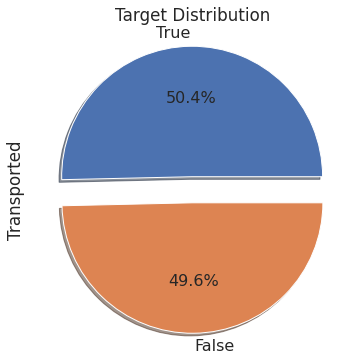

In [12]:

#Figure size 
plt.figure(figsize = (6,6))

#Plotting a pie plot
train['Transported'].value_counts().plot.pie(explode = [0.1, 0.1] , autopct = '%1.1f%%' , shadow = True , textprops = {'fontsize' : 16 }).set_title('Target Distribution')

The target is almost balanced, therefore we have to bother about underfitting or overfitting.

**Continuos Features**

Text(0, 0.5, 'Transportation count')

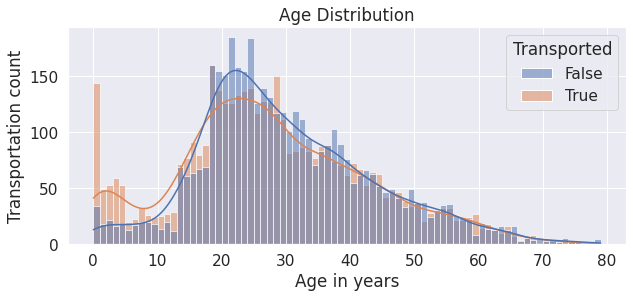

In [13]:
#Figsize 
plt.figure(figsize = (10,4))

#Plotting a histogram
sns.histplot(data = train , x = 'Age' , hue = 'Transported' , binwidth = 1 , kde = True)
plt.title("Age Distribution")
plt.xlabel("Age in years")
plt.ylabel('Transportation count')

We can observe from the above histogram that:
* people below the age of age of 18 are more likely to get transported
* Infants have the highest chances of transportation
* The people in the agegroup of 18 - 30 have almost equal chances of being transported or not.
* people above the age 30 have less chances of being transported
* people of old age have the least chances of transportation

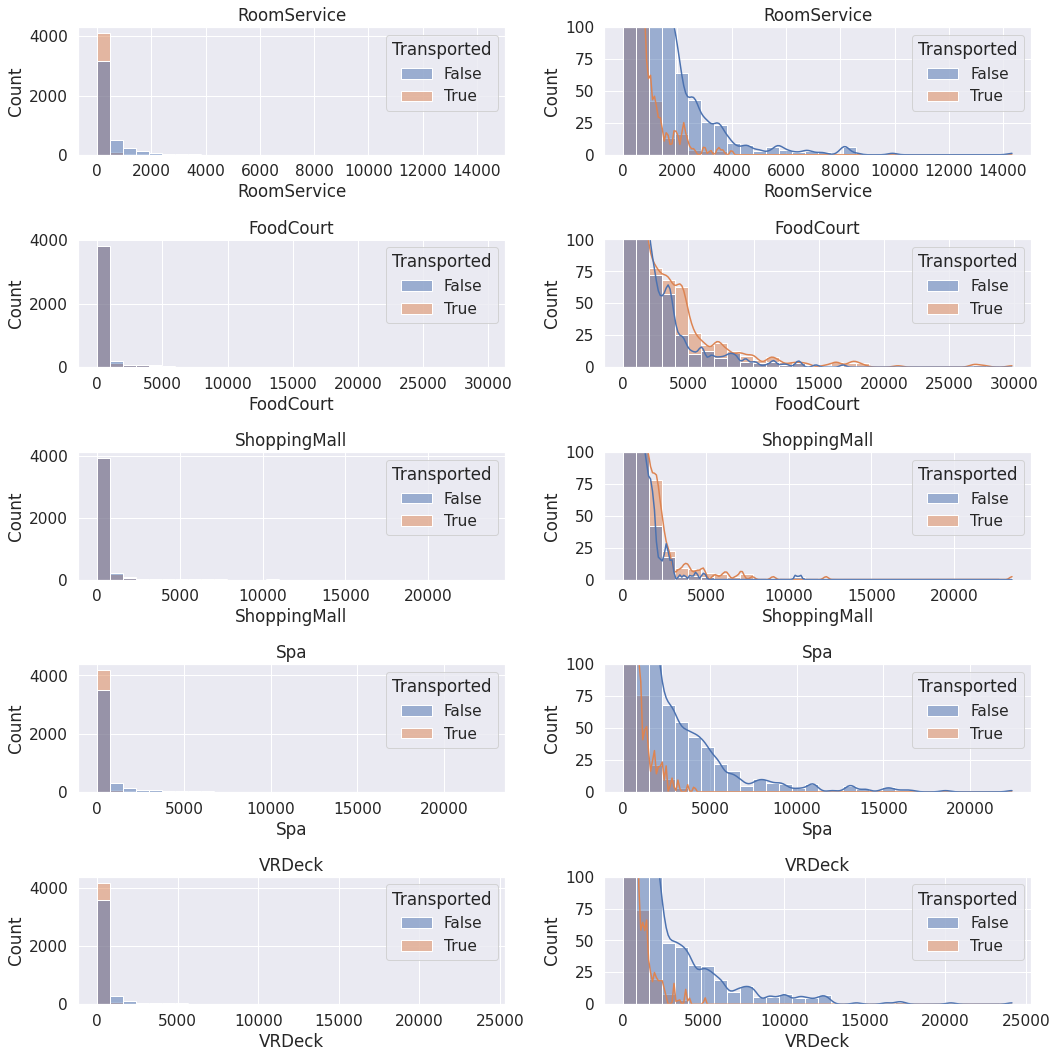

In [14]:
#Expenditure Features
exp_features = ['RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa' , 'VRDeck']

#Plotting expenditure features
fig = plt.figure(figsize = (15,15))
for i, var_name in enumerate(exp_features):
    #left plot
    ax = fig.add_subplot(5,2,2*i+1)
    sns.histplot(data = train , x = var_name , axes = ax , bins = 30 , kde = False , hue = 'Transported')
    ax.set_title(var_name)
    
    #Right Plot
    ax = fig.add_subplot(5,2,2*i+2)
    sns.histplot(data = train , x = var_name , axes = ax , bins = 30 , kde = True , hue = 'Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()



From the above histograms we can observe that:
* Most people do not spend on these items
* The distribution of spending decays exponentially
* people who were transported tends to spend less


**Categorical Features**

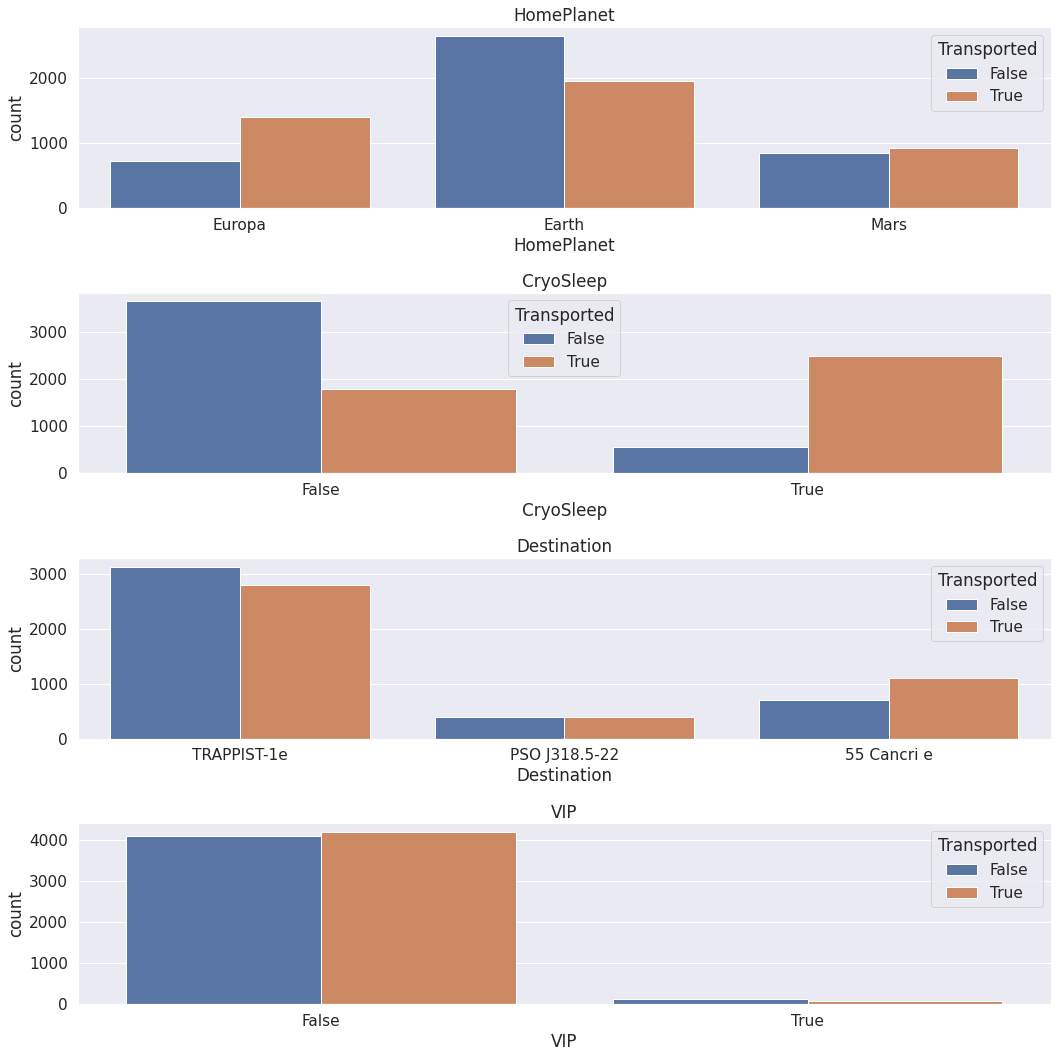

In [15]:
#Categorical features
c_features = ['HomePlanet' , 'CryoSleep' , 'Destination' , 'VIP']

#Plotting categorical features
fig = plt.figure(figsize=(15,15))
for i , var_name in enumerate(c_features):
    ax=fig.add_subplot(4, 1, i+1)
    sns.countplot(data = train , x = var_name , axes = ax , hue = 'Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

From the above plots we can observe that:
* Most people were from Earth and they got transported the most.
* The people who were not in CryoSleep had better chances of being transported
* The people who were going to TRAPPIST - 1e got transported the most
* There are very few people who fall under the VIP category - It will be better if we drop this column

**Qualitative Features**

In [16]:
#Qualitative Featueres
q_features = ['PassengerId' , 'Cabin' , 'Name']

#preview
train[q_features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


We can see the qualitative features are not in numerical form, that's why we cannot plot them. We will modify them and make them capable of training our models.

# Feature Engineering


Now we will modify the features according to our needs.

**Age Group**

we will divide the age into different age groups.

Text(0.5, 1.0, 'Age Group Distribution')

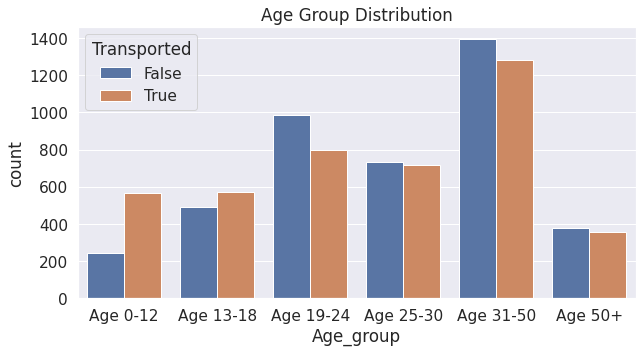

In [17]:
#Training Dataset - making age groups
train['Age_group'] = np.nan
train.loc[train['Age'] <=12, 'Age_group'] = 'Age 0-12'
train.loc[(train['Age']>12) & (train['Age']<=18) ,'Age_group']= 'Age 13-18'
train.loc[(train['Age']>18) & (train['Age']<=24) ,'Age_group']= 'Age 19-24'
train.loc[(train['Age']>24) & (train['Age']<=30) ,'Age_group']= 'Age 25-30'
train.loc[(train['Age']>30) & (train['Age']<=50) ,'Age_group']= 'Age 31-50'
train.loc[train['Age']>50, 'Age_group'] = 'Age 50+'

#Testing Dataset  - making age groups
test['Age_group'] = np.nan
test.loc[test['Age'] <=12, 'Age_group'] = 'Age 0-12'
test.loc[(test['Age']>12) & (test['Age']<=18) ,'Age_group']= 'Age 13-18'
test.loc[(test['Age']>18) & (test['Age']<=24) ,'Age_group']= 'Age 19-24'
test.loc[(test['Age']>24) & (test['Age']<=30) ,'Age_group']= 'Age 25-30'
test.loc[(test['Age']>30) & (test['Age']<=50) ,'Age_group']= 'Age 31-50'
test.loc[test['Age']>50, 'Age_group'] = 'Age 50+'

#Plot visualization of Age Groups
plt.figure(figsize= (10,5))
sns.countplot(data = train, x = 'Age_group' , hue = 'Transported' , order = ['Age 0-12' , 'Age 13-18' , 'Age 19-24' , 'Age 25-30' , 'Age 31-50',  'Age 50+' ])
plt.title('Age Group Distribution')

We can see from the above plot that:
* The people in the age group of 31-50 were the most transported and not transported. 
* Age group 0-12 has highest transportation rate.

**Expenditure**

Now we will calculate the total expenditure of the passengers and will identify the people who do not spend anything.

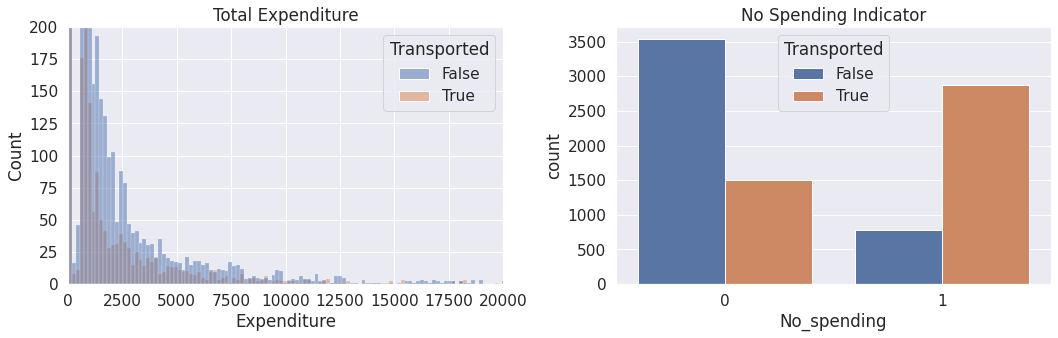

In [18]:
#Training dataset - Expenditure
train['Expenditure'] = train[exp_features].sum(axis = 1)
train['No_spending'] = (train['Expenditure'] ==0).astype(int)

#Testing dataset - Expenditure
test['Expenditure'] = test[exp_features].sum(axis = 1)
test['No_spending'] = (test['Expenditure'] ==0).astype(int)

#plotting expenditure and no spending
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data = train , x = 'Expenditure' , hue = 'Transported' , bins=200)
plt.title('Total Expenditure')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data = train, x='No_spending' , hue = 'Transported')
plt.title('No Spending Indicator')
fig.tight_layout()



We can observe from the above two plots that:
* most people does not spend money
* No_spending people did get transported more.

**Passenger Group Size**

Here we will extract passenger groups and group size from passenger Id.

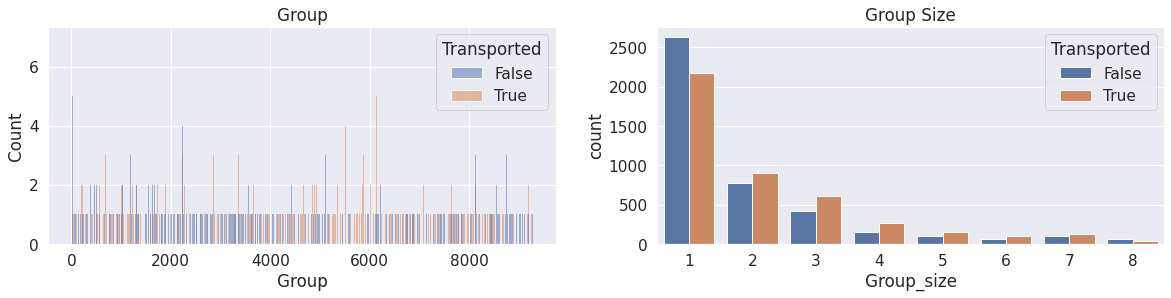

In [19]:
#New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

#Group Sizing
train['Group_size'] = train['Group'].map(lambda x: pd.concat([train['Group'] , test['Group']]).value_counts()[x])
test['Group_size'] = test['Group'].map(lambda x: pd.concat([train['Group'] , test['Group']]).value_counts()[x])

#plot distribution of new features
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.histplot(data = train , x='Group' , hue ='Transported' , binwidth =1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data = train , x= 'Group_size' , hue = 'Transported')
plt.title('Group Size')
fig.tight_layout()

Here we can observe that the people who have group size one got transported and failed to get transported the most.
The group column has a large number of values, we will not use it further.
We will use the column Group_size. We can compress this feature further by creating a 'Solo' column that tracks whether someone is travelling on their own or not. 

(0.0, 3000.0)

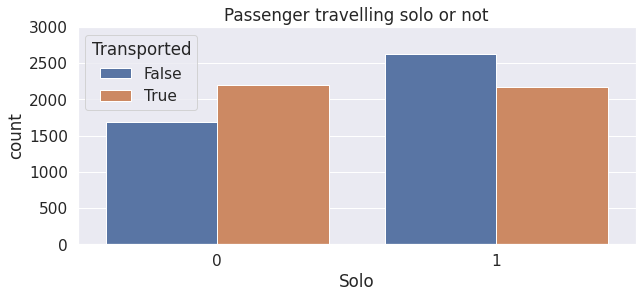

In [20]:
#Making Solo column
train['Solo'] = (train["Group_size"] == 1).astype(int)
test['Solo'] = (test["Group_size"] == 1).astype(int)

#plotting distribution
plt.figure(figsize = (10,4))
sns.countplot(data = train , x = 'Solo' , hue = 'Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

Here we can see that the passenger travelling solo were more likely to fail as compared to passengers who were with groups of atleast one people.

**Cabin Location**

Extracting deck, number and side from Cabin column.

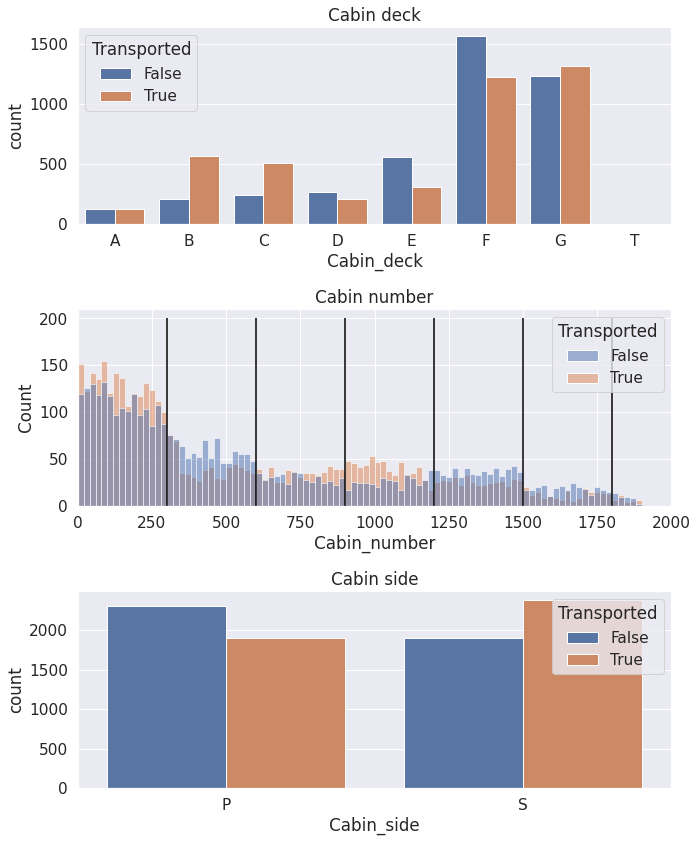

In [21]:
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

From the above plots we can observe that:
* Cabin deck F and G have the most number of people who got transported or not.
* Cabin_number is grouped into chunks of 300 cabins- we will further make groups out of these.
* The people of Cabin_side S has more success rate than the people of Cabin_P side.


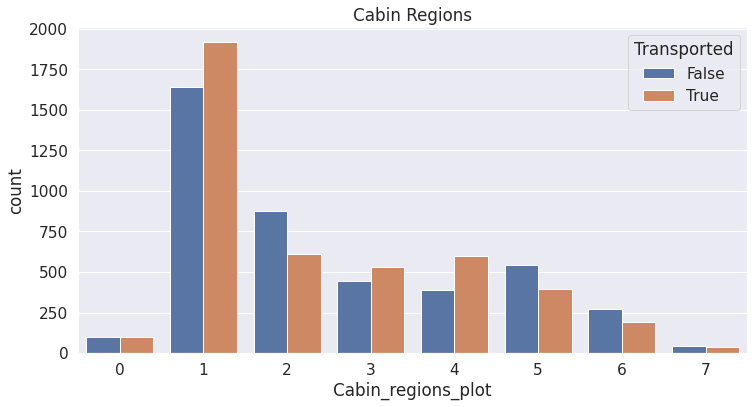

In [22]:
#New feature - Training Dataset
train['Cabin_region1'] = (train['Cabin_number']<300).astype(int)  #One - hot Encoding
train['Cabin_region2'] = ((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
train['Cabin_region3'] = ((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
train['Cabin_region4'] = ((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
train['Cabin_region5'] = ((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
train['Cabin_region6'] = ((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
train['Cabin_region7'] = (train['Cabin_number']>=1800).astype(int)


#New feature - Testing Dataset
test['Cabin_region1'] = (test['Cabin_number']<300).astype(int)  #One - hot Encoding
test['Cabin_region2'] = ((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
test['Cabin_region3'] = ((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
test['Cabin_region4'] = ((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
test['Cabin_region5'] = ((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
test['Cabin_region6'] = ((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
test['Cabin_region7'] = (test['Cabin_number']>=1800).astype(int)

#Plotting distribution of new features
plt.figure(figsize = (12,6))
train['Cabin_regions_plot'] = (train['Cabin_region1'] + 2*train['Cabin_region2'] + 3*train['Cabin_region3'] + 4*train['Cabin_region4'] + 5*train['Cabin_region5'] + 6*train['Cabin_region6'] + 7*train['Cabin_region7']).astype(int)
sns.countplot(data = train , x = 'Cabin_regions_plot' , hue = 'Transported')
plt.title('Cabin Regions')
train.drop('Cabin_regions_plot' , axis= 1 , inplace = True)



Here we can observe that most of the Cabin numbers were less that 300 - lies in the Cabin_region1.

**Surname**

Now will calculate the family size from the last name.

Text(0.5, 1.0, 'Family Size')

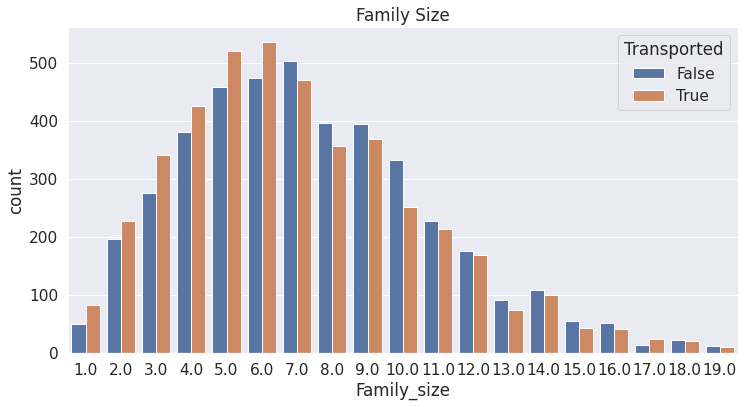

In [23]:
#Replacing NaN's with outliers for now (so we can split feature)
train['Name'].fillna('Unknown Unknown' , inplace = True)
test['Name'].fillna('Unknown Unknown' , inplace = True)

#New feature - Surname
train['Surname'] = train['Name'].str.split().str[-1]
test['Surname'] = test['Name'].str.split().str[-1]

#New feature - Family Size
train['Family_size'] = train['Surname'].map(lambda x: pd.concat([train['Surname'] , test['Surname']]).value_counts()[x])
test['Family_size'] = test['Surname'].map(lambda x: pd.concat([test['Surname'] , test['Surname']]).value_counts()[x])

#Putting NaN's back in (we will fill these later)
train.loc[train['Surname'] == 'Unknown' , 'Surname'] = np.nan
train.loc[train['Family_size'] > 100 , 'Family_size'] = np.nan
test.loc[test['Surname'] == 'Unknown' , 'Surname'] = np.nan
test.loc[test['Family_size'] > 100 , 'Family_size'] = np.nan

#Dropping name 
train.drop('Name' , axis = 1 , inplace = True)
test.drop('Name' , axis = 1 , inplace = True)

#Plotting new feature distribution
plt.figure(figsize = (12,6))
sns.countplot(data = train , x = 'Family_size' , hue = 'Transported')
plt.title('Family Size')

Here we can observe that:
* People having high family size have high chances of being transported
* People having family size of 6 have the highest success rate.


we are assuming that people having same surname or last name belongs to one family.

# Missing Values

**Combining training and testing datasets**

we will do this to check the missing values and to fill them. By this way we don't have to write separate codes for training and testing datasets.

In [24]:
#Labels and features 
#Dropping Transported column from train to make it similar to the test dataset. We will add it later.
y = train['Transported'].copy().astype(int)
X = train.drop('Transported' , axis = 1).copy()

#Concatenate training and testing datasets
data = pd.concat([X,test] , axis = 0).reset_index(drop = True)


**Exploring Missing Values**

In [25]:
#columns with missing values
na_cols = data.columns[data.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(data[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


Text(0.5, 1.0, 'Heatmap of Missing values')

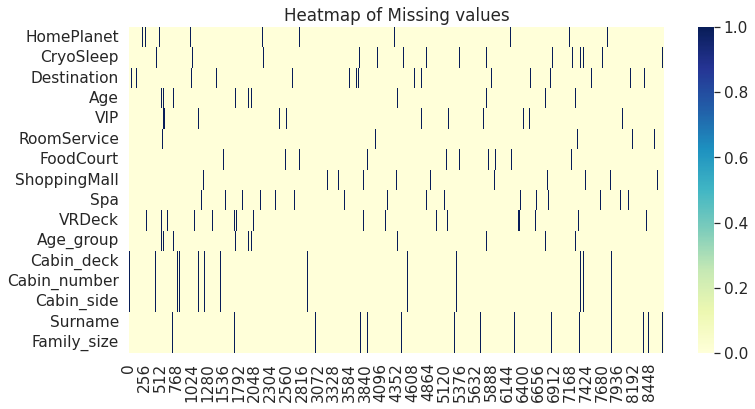

In [26]:
#Heatmap of missing values
plt.figure(figsize = (12,6))
sns.heatmap(train[na_cols].isna().T , cmap = "YlGnBu")
plt.title('Heatmap of Missing values')

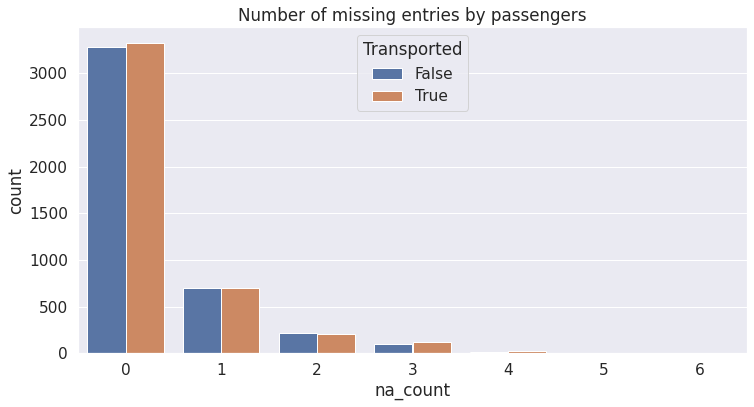

In [27]:
#Number of missing values by passengers
train['na_count'] = train.isna().sum(axis = 1)
plt.figure(figsize = (12,6))
sns.countplot(data = train , x = 'na_count' , hue = 'Transported')
plt.title('Number of missing entries by passengers')
train.drop('na_count' , axis = 1 , inplace = True)


Here we can observe that atleast 25% of the passengers are missing atleast one value in any of the column. Now we will fill the missing values.

**How we will fill the missing values**

To fill the data, we will look for patterns within the missing data. This can be done by looking at the **joint distribution** of features eg. do passengers from the same group tend to come from the same family? We will look for these kind of patterns.

**HomePlanet and Group**

In [28]:
#Joint distribution of group and Home Planet
GHP_gb = data.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Text(0.5, 1.0, 'Number of Unique Home Planets per group')

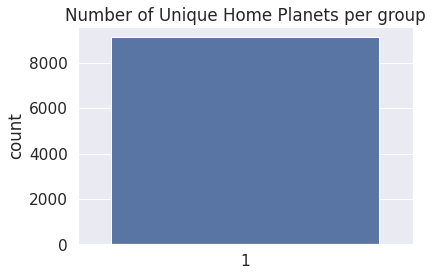

In [29]:
#Countplot of unique values
sns.countplot((GHP_gb>0).sum(axis = 1))
plt.title('Number of Unique Home Planets per group')

This shows that everyone in the same group comes from the same home planet. So we can fill the missing HomePlanet values according to the group. (At least the ones where the group size is bigger than 1)

In [30]:
#Missing Values before
HP_bef = data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
GHP_index = data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

#Filling corresponding missing values
data.loc[GHP_index , 'HomePlanet'] = data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis = 1)[x])

#printing number of missing values left
print('HomePlanet missing values before: ',HP_bef)
print('HomePlanet missing values after: ' , data['HomePlanet'].isna().sum())

HomePlanet missing values before:  288
HomePlanet missing values after:  157


By using group we have filled some missing values let's fill the remaining values.

**HomePlanet and CabinDeck**

<AxesSubplot:xlabel='Cabin_deck', ylabel='HomePlanet'>

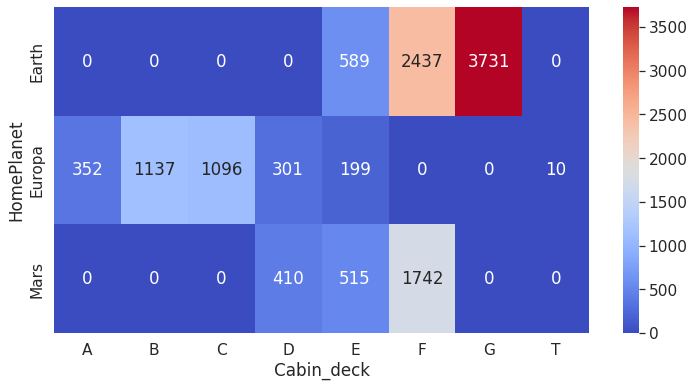

In [31]:
#joint distribution of CabinDeck and HomePlanet
CDHP_gb = data.groupby(['Cabin_deck' , 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

#Heatmap of missing values
plt.figure(figsize = (12,6))
sns.heatmap(CDHP_gb.T , annot = True , fmt = 'g' , cmap = 'coolwarm')

Here we can observe that: 

* Passengers of deck G belong to Earth
* Passengers of deck A,B,C and T belong to Europa
* Passengers of deck D,E,F and Z belong to multiple places.

Now we will fill the missing values based on these facts.

In [32]:
# Missing value before
HP_bef = data['HomePlanet'].isna().sum()

#People on decks A,B,C and T belong to Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A' , "B" , 'C' ,'T'])) , 'HomePlanet'] = 'Europa'

#People on deck G belong to Earth
data.loc[(data['HomePlanet'].isna()) & data['Cabin_deck'].isin(['G']), 'HomePlanet'] = 'Earth'

#Printing remaining values
print('HomePlanet missing values before: ',HP_bef)
print('HomePlanet missing values after: ',data['HomePlanet'].isna().sum())

HomePlanet missing values before:  157
HomePlanet missing values after:  94


Now we are left with 94 missing values,let's fill these too by using Surname.

**HomePlanet and Surname**

Text(0.5, 1.0, 'Number of unique planets per surname')

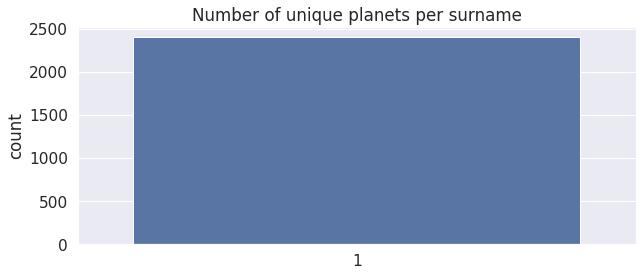

In [33]:
#Joint Distribution of Surname and HomePlanet
SHP_gb = data.groupby(['Surname' , 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

#Countplot of unique values
plt.figure(figsize  = (10,4))
sns.countplot((SHP_gb>0).sum(axis =1))
plt.title('Number of unique planets per surname')

Here we can see that people having same surname comes from the same Home Planet.

In [34]:
#Missing values before
HP_bef = data['HomePlanet'].isna().sum()

#Passengers with missing HomePlanet having a family with known HomePlanet
SHP_index = data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

#Filling the missing values
data.loc[SHP_index,'HomePlanet'] = data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis = 1)[x])

#Printing missing values
print('HomePlanet missing values before: ' , HP_bef)
print('HomePlanet missing values after: ' , data['HomePlanet'].isna().sum())


HomePlanet missing values before:  94
HomePlanet missing values after:  10


Now only 10 values are missing. Let's fill them.

In [35]:
#Missing 10 values
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,NaN,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,NaN,TRAPPIST-1e
10583,4052_01,NaN,TRAPPIST-1e
11913,7065_01,NaN,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,NaN,TRAPPIST-1e


All the missing values have destination TRAPPIST-1e. Now we will use destination to fill the missing values.

**HomePlanet and Destination**

<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

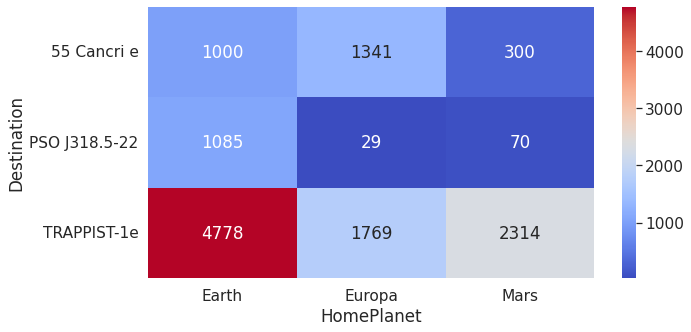

In [36]:
#Joint distribution of HomePlanet and Destination
HPD_gb = data.groupby(['HomePlanet' , 'Destination'])['Destination'].size().unstack().fillna(0)

#Heatmap of missing values
plt.figure(figsize = (10,5))
sns.heatmap(HPD_gb.T , annot = True , fmt = 'g' , cmap = 'coolwarm')


Here we can see that most of the passengers from planet Earth were going to TRAPPIST-1e. But we have seen before in the deck data that people from Earth were not on all the decks, we will use this fact to fill the remaining values.

In [37]:
#Missing values before 
HP_bef = data['HomePlanet'].isna().sum()

#Filling missing values - with Earth if not on deck D and mars if on deck D
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D') , "HomePlanet"] = 'Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D') , "HomePlanet"] = 'Mars'

#printing remaining missing values
print('Missing HomePlanet values before: ',HP_bef)
print('Missing HomePlanet values after: ', data['HomePlanet'].isna().sum())


Missing HomePlanet values before:  10
Missing HomePlanet values after:  0


Every missing HomePlanet has been filled.

**Destination**

Now, we will fill the missing destination values.

Since the majority (68%) of passengers are heading towards TRAPPIST-1e , we'll just impute this value (i.e. the mode). 

In [38]:
#Missing values before
D_bef = data['Destination'].isna().sum()

#Filling missing destination values with mode
data.loc[(data['Destination'].isna()) ,'Destination'] = 'TRAPPIST-1e'

#Printing the missing values
print('Missing Destination values before: ',D_bef)
print('Missing Destination values after' , data['Destination'].isna().sum())

Missing Destination values before:  274
Missing Destination values after 0


**Surname**

Now we will fill the missing surnames.

Text(0.5, 1.0, 'Number of unique surnames by group')

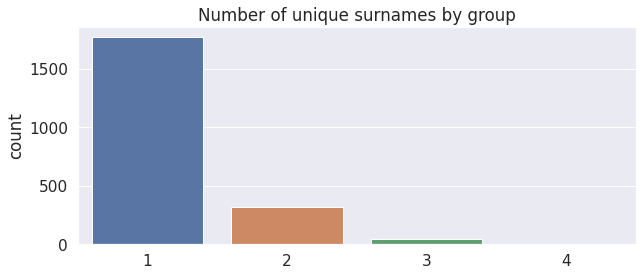

In [39]:
#Joint distribution of group and Surname
GSN_gb = data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

#Countplot of unique values
plt.figure(figsize = (10,4))
sns.countplot((GSN_gb>0).sum(axis = 1))
plt.title('Number of unique surnames by group')


The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [40]:
#Missing values before
SN_bef = data['Surname'].isna().sum()

#Passengers with missing surname and in a group with known majority surname
GSN_index = data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

#Filling the missing values
data.loc[GSN_index,'Surname'] = data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis = 1)[x])

#Printing missing values
print('Missing Surname values before: ',SN_bef)
print('Missing Surname values after: ', data['Surname'].isna().sum())

Missing Surname values before:  294
Missing Surname values after:  155


There is no need for us to fill the remaining 155 values because we will drop the surname column, but we can update the family size feature.

In [41]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

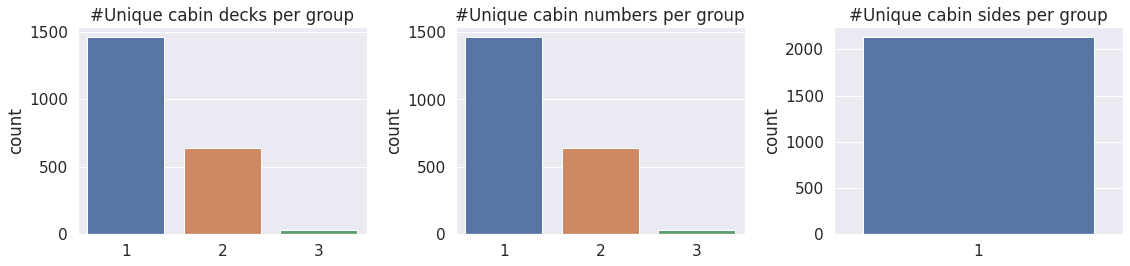

In [42]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

Here we can see that everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.

In [43]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


**CabinSide and Surname**

Text(0.5, 1.0, 'Ratio of CabinSide by surname')

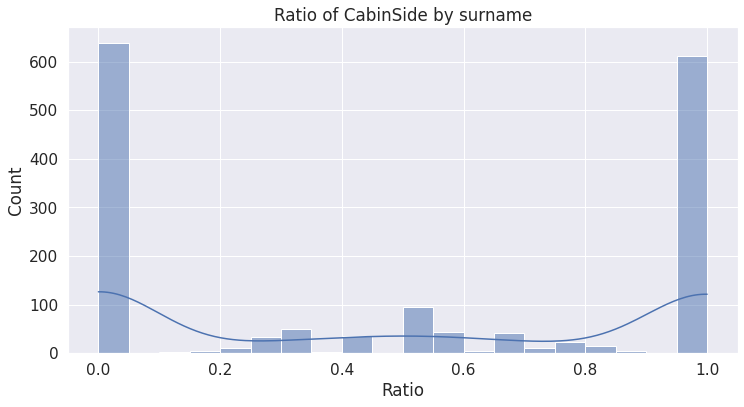

In [44]:
#Joint distribution of CabinSide and Surname
SCS_gb = data[data['Group_size']>1].groupby(['Surname' , 'Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

#Ratio of Sides
SCS_gb['Ratio'] = SCS_gb['P']/(SCS_gb['P'] + SCS_gb['S'])

#Histogram of Ratio
plt.figure(figsize = (12,6))
sns.histplot(SCS_gb['Ratio'] , kde = True , binwidth = 0.05)
plt.title("Ratio of CabinSide by surname")

In [45]:
#Printing Proportion
print('Percentage of families all on the same cabin side: ', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')


Percentage of families all on the same cabin side:  76.7 %


This shows that most of the families prefer to be on the same side of the cabin.

In [46]:
SCS_gb.head()

Cabin_side,P,S,Ratio
Surname,,,
Acobson,0.0,3.0,0.0
Acobsond,3.0,0.0,1.0
Adavisons,6.0,0.0,1.0
Admingried,0.0,4.0,0.0
Aginge,3.0,0.0,1.0


In [47]:
#Missing Values before
CS_bef = data['Cabin_side'].isna().sum()

#Dropping Ratio Column
SCS_gb.drop('Ratio',axis = 1, inplace=True)

#Passengers with missing Cabin side and in a family with known Cabin side
SCS_index = data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

#Filling missing values
data.loc[SCS_index , 'Cabin_side'] = data.iloc[SCS_index , :]['Surname'].map(lambda x: SCS_gb.idxmax(axis = 1)[x])

#Dropping Surname column
data.drop('Surname' , axis = 1 , inplace = True)

#Printing number of missing values left
print('Missing Surname values before: ',CS_bef)
print('Missing Surname values after: ',data['Cabin_side'].isna().sum())

Missing Surname values before:  162
Missing Surname values after:  66


To fill the remaining 66 missing values we will use the outliers.

In [48]:
#Value Counts
data['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [49]:
#Missing values before
CS_bef = data['Cabin_side'].isna().sum()

#Filling remaining values with outliers
data.loc[data['Cabin_side'].isna(), 'Cabin_side'] = 'Z'

#Printing the remaining missing values
print('Missing surname values before:  ',CS_bef)
print('Missing Surname values after: ',data['Cabin_side'].isna().sum())


Missing surname values before:   66
Missing Surname values after:  0


The surname column is complete now.

**Cabin Deck and Group**

In [50]:
#Missing values before
CD_bef = data['Cabin_deck'].isna().sum()

#Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index = data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

#Filling missing values
data.loc[GCD_index,'Cabin_deck'] = data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis = 1)[x])

#Printing missing values before
print("Missing CabinDeck values before: ",CD_bef)
print('Missing CabinDeck values after: ',data['Cabin_deck'].isna().sum())

Missing CabinDeck values before:  299
Missing CabinDeck values after:  162


**Cabin Deck and Home Planet**

In [51]:
#Joint Distribution
data.groupby(['HomePlanet' , 'Destination' ,'Solo' ,'Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

We can observe here that:
* Passengers from mars are most likely to be on deck F
* Passengers form Europa are most likely to be on deck C if they are travelling solo, otherwise they are most likely to be on deck B.
* Passengers from Earth are most likely to be on deck F and G.

We will use mode to fill the missing values.


In [52]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_number,Cabin_side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Family_size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0.0,P,1,0,0,0,0,0,0,4
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0.0,S,1,0,0,0,0,0,0,4
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0.0,S,1,0,0,0,0,0,0,7
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0.0,S,1,0,0,0,0,0,0,7
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,1.0,S,1,0,0,0,0,0,0,9


In [53]:
#Missing Values before
CD_bef = data['Cabin_deck'].isna().sum()

#Filling missing values using the mode
na_rows_CD = data.loc[data['Cabin_deck'].isna() , 'Cabin_deck'].index

data.loc[data['Cabin_deck'].isna(),'Cabin_deck'] = data.groupby(['HomePlanet' , 'Destination' , 'Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

#printing remaining missing values
print('Missing Cabin Deck values before: ',CD_bef)
print('Missing Cabin Deck values after: ',data['Cabin_deck'].isna().sum())

Missing Cabin Deck values before:  162
Missing Cabin Deck values after:  0


The missing Cabin Deck values has been filled.

**CabinNumber and CabinDeck**

Text(0.5, 1.0, 'Cabin_number vs group with respect to Cabin_deck')

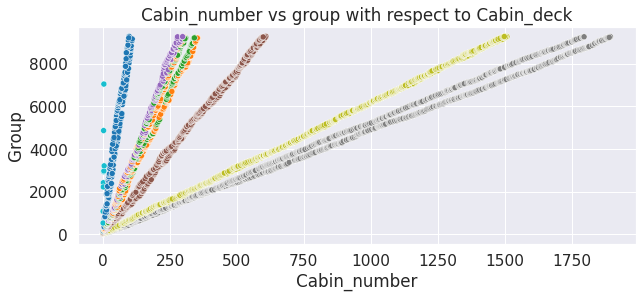

In [54]:
#plotting a scatterplot
plt.figure(figsize = (10,4))
sns.scatterplot(x = data['Cabin_number'] , y = data['Group'] , c = LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna() , 'Cabin_deck']) , cmap = 'tab10')
plt.title('Cabin_number vs group with respect to Cabin_deck')

There is an interesting pattern here. The cabin_number and group_number share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.


In [55]:
#Missing values before
CN_bef = data['Cabin_number'].isna().sum()

#Extrapolating linear relationship on deck by deck basis
for deck in ['A' , 'B' , 'C' , 'D' , 'E' , 'F' , 'G']:
    #Features and Labels
    X_CN = data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck'] == deck ) ,'Group'] 
    y_CN = data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck'] == deck ) ,'Cabin_number']
    X_test_CN = data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck'] == deck ) , 'Group']
    
    #Linear Regression
    model_CN = LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1,1) ,y_CN)
    preds_CN = model_CN.predict(X_test_CN.values.reshape(-1,1))
    
    #Filling missing values
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck'] == deck ) , 'Cabin_number']  = preds_CN.astype(int)
    
#Printing the remaining missing values
print('Cabin Number values missing before: ' , CN_bef)
print('Cabin Number values missing after: ' , data['Cabin_deck'].isna() . sum())

Cabin Number values missing before:  299
Cabin Number values missing after:  0


All the missing Cabin Number values are filled.


Now we will the new cabin data.

In [56]:
#One hot encoding of Cabin Regions
data['Cabin_region1'] = (data['Cabin_number'] < 300).astype(int)
data['Cabin_region2'] = ((data['Cabin_number']>= 300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3'] = ((data['Cabin_number']>= 600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4'] = ((data['Cabin_number']>= 900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5'] = ((data['Cabin_number']>= 1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6'] = ((data['Cabin_number']>= 1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7'] = (data['Cabin_number'] >=1800).astype(int)


**VIP**

VIP is a highly unbalanced binary feature so we will just impute the mode.

In [57]:
data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [58]:
#Missing values before
V_bef = data['VIP'].isna().sum()

#Filling the missing values by using mode
data.loc[data['VIP'].isna() , 'VIP'] = False

#Print the missing values
print("Missing VIP values before: " , V_bef)
print('Missing VIP values after: ' , data['VIP'].isna().sum())

Missing VIP values before:  296
Missing VIP values after:  0


We filled all the missing VIP values.

**AGE**

Age varies across many features like HomePlanet, group size, expenditure and cabin deck, so we will impute missing values according to the median of these subgroups.

In [59]:
#Joint Distribution
data.groupby(['HomePlanet' , 'No_spending' , 'Solo' , 'Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

Here we can observe that:

* People from Earth are less than 30 years of age.
* People from Europa are more than 30 years of age.
* People from mars are aroung 30 years of age.



In [60]:
#Missing values before
A_bef = data[exp_features].isna().sum().sum()

#Filling missing values using the median
na_rows_A = data.loc[data['Age'].isna() , 'Age'].index 
data.loc[data['Age'].isna() , "Age"] = data.groupby(['HomePlanet' , 'No_spending' , 'Solo' , 'Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

#Printing missing values
print('Missing Age values before: ' , A_bef)
print('Missing Age value after: ' , data['Age'].isna().sum())


Missing Age values before:  1410
Missing Age value after:  0


Now we will update the age group feature using the new data.

In [61]:
data.loc[data['Age']<=12 , 'Age_group'] = 'Age 0-12'
data.loc[(data['Age'] >12) & (data['Age'] <=18) ,'Age_group'] = 'Age 13-18'
data.loc[(data['Age'] >18) & (data['Age'] <=24) ,'Age_group'] = 'Age 19-24'
data.loc[(data['Age'] >24) & (data['Age'] <=30) ,'Age_group'] = 'Age 25-30'
data.loc[(data['Age'] >30) & (data['Age'] <=50) ,'Age_group'] = 'Age 31-50'
data.loc[data['Age']>50 , 'Age_group'] = 'Age 50+'

**Cryo Sleep**

The best way to predict if a passenger is in CryoSleep or not is to see if they spent anything.

In [62]:
#Joint Distribution
data.groupby(['No_spending' , 'CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


In [63]:
#Missing values before
CSL_bef = data['CryoSleep'].isna().sum()

#Filling the missing values using mode
na_rows_CSL = data.loc[data['CryoSleep'].isna() , 'CryoSleep'].index
data.loc[data['CryoSleep'].isna() ,"CryoSleep"] = data.groupby(['No_spending'])['CryoSleep'].transform(lambda x:  x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

#Printing missing values
print('Missing CryoSleep values before: ' , CSL_bef)
print('Missing CryoSleep values after: ' , data['CryoSleep'].isna().sum())

Missing CryoSleep values before:  310
Missing CryoSleep values after:  0


All the missing CryoSleep values has been filled.

**Expenditure and CryoSleep**



We don't expect people in CryoSleep to be able to spend anything.

In [64]:
print('Maximum expenditure of passengers who are in CryoSleep: ', data.loc[data['CryoSleep'] == True , exp_features].sum(axis = 1).max())

Maximum expenditure of passengers who are in CryoSleep:  0.0


In [65]:
#Missing Values before
E_bef = data[exp_features].isna().sum().sum()

#CryoSleeping passengers have no expenditure
for col in exp_features:
    data.loc[(data[col].isna()) & (data["CryoSleep"] == True) , col ] =0 
    
#Printing missing values
print('Missing Expenditure values before: ',E_bef)
print('Missing Expenditure values after: ',data[exp_features].isna().sum().sum())

Missing Expenditure values before:  1410
Missing Expenditure values after:  866


**Expenditure and Others**

Expenditure varies across many features but we will only impute missing values using HomePlanet, Solo and Age group to prevent overfitting. We will also use the mean instead of the median because a large proportion of passengers don't spend anything and median usually comes out as 0.  Note how under 12's don't spend anything.

In [66]:
#Joint Distribution 
data.groupby(['HomePlanet' , 'Solo' , 'Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age 0-12    Age 13-18    Age 19-24    Age 25-30    Age 31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   725.122449   782.368932   857.608365   736.655773   
           1          0.0   703.192020   785.846959   799.395480   794.818627   
Europa     0          0.0  1350.567164  2520.317797  3486.307544  3975.774005   
           1          0.0  1887.958333  2370.200000  3567.165441  3949.939929   
Mars       0          0.0  1123.175141  1221.202290  1201.476852  1143.671916   
           1          0.0  1489.655172  1082.798561  1069.756173  1110.392045   

Age_group            Age 50+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [67]:
#Missing values before
E_bef = data[exp_features].isna().sum().sum()

#Filling missing values using the mean
for col in exp_features:
    na_rows = data.loc[data[col].isna() , col].index
    data.loc[data[col].isna() ,col] = data.groupby(['HomePlanet' , 'Solo' , 'Age_group'])[col].transform(lambda x : x.fillna(x.mean()))[na_rows]
    
#Printing missing values
print('Missing Expenditure values before: ' , E_bef)
print('Missing Expenditure values after: ' , data[exp_features].isna().sum().sum())

Missing Expenditure values before:  866
Missing Expenditure values after:  0


Expenditure feature now have 0 missing values.

Now, we can update the expenditure and No_spending features with these new data points.

In [68]:
#Update expenditure and No_spending 
data['Expenditure'] = data[exp_features].sum(axis = 1)
data['No_spending'] = (data['Expenditure'] ==0).astype(int)

In [69]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

We have filled all the missing values, now we will move forward to train our models.

# Preprocessing

**Splitting data back into train and test Datasets**

In [70]:
#Train and test datasets
X = data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test = data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

**Dropping unwanted features**

In [71]:
#Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId' , 'Group' , 'Group_size' , 'Age_group' ,'Cabin_number'] , axis = 1 , inplace = True)
X_test.drop(['PassengerId' , 'Group' , 'Group_size' , 'Age_group' ,'Cabin_number'] , axis = 1 , inplace = True)

**Logarithmic Transform**

The logarithm transform is used to decrease skew in distributions, especially with large outliers. It can make it easier for algorithms to 'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers.

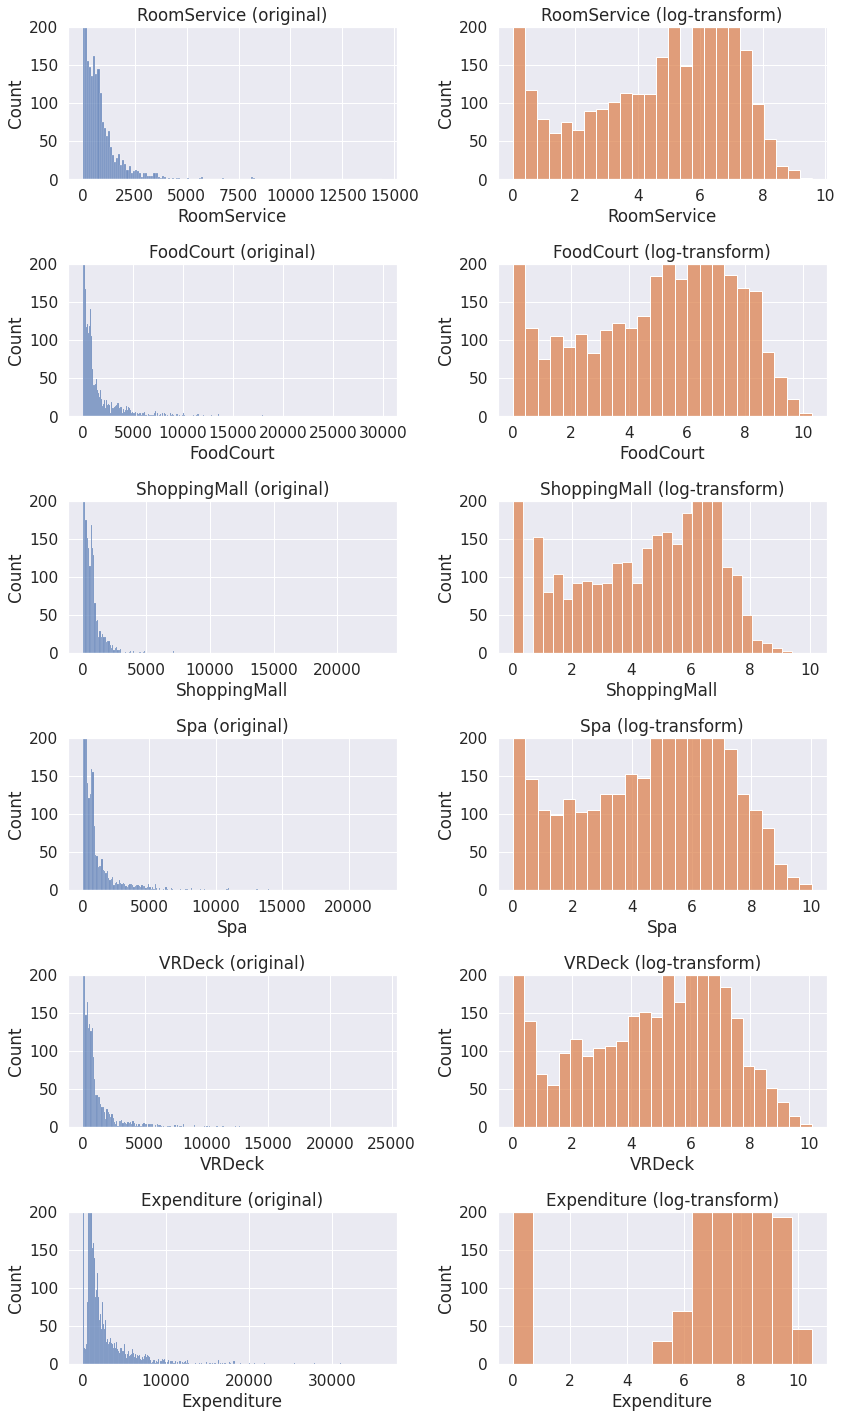

In [72]:
#Plotting log transform results
fig = plt.figure(figsize = (12 , 20))
for i , col in enumerate(['RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa' , 'VRDeck' , 'Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col] , binwidth = 100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]) ,color = 'C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
    
fig.tight_layout()
plt.show()
    
                 

**Encoding and Scaling**

In [73]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

**Encoding and Scaling**

We will use column transformers to be more professional. It's also good practice.

In [74]:
#Identifying numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64' , 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == 'object']

#Scaling numerical data to have mean = 0 and variance = 1
numerical_transformer = Pipeline(steps = [('Scalar' , StandardScaler())])

#One - hot Encoding Categorical data
categorical_transformer = Pipeline(steps = [['onehot' , OneHotEncoder(drop = 'if_binary' , handle_unknown = 'ignore' , sparse = False)]])

#Combine processing
ct = ColumnTransformer(
    transformers = [
        ('num' , numerical_transformer , numerical_cols),
        ('cat' ,  categorical_transformer, categorical_cols)
    ]  , remainder = 'passthrough')

#Applying Preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

#Printing new shape
print('Training Dataset shape' , X.shape)

Training Dataset shape (8693, 36)


**Principal Component Analysis(PCA)**

This gives a low dimensional representation of the data, which preserves local and global structure.

In [75]:
pca = PCA(n_components = 3)
components = pca.fit_transform(X)
 
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
     components , x= 0 , y =1 , z =2 , color = y , size = 0.1*np.ones(len(X)) , opacity = 1,
     title = f'Total Explained Variance: {total_var:.2f}%',
     labels = {'0' : 'PCA 1' , '1' : 'PCA 2' , '2' : 'PCA 3'},
     width = 800 , height = 500)
fig.show()



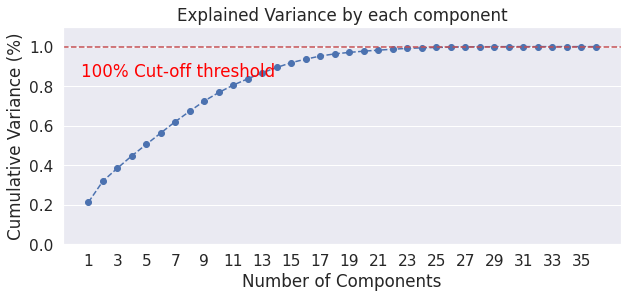

In [76]:
#Explaining Variance (how important each additional principal component is)
pca = PCA().fit(X)
fig , ax = plt.subplots(figsize = (10,4))
xi = np.arange(1, 1+X.shape[1] , step =1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi , yi , marker = 'o' , linestyle = '--' , color = 'b')

#Asthetics
plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1] , step = 2))
plt.ylabel('Cumulative Variance (%)')
plt.title('Explained Variance by each component')
plt.axhline(y =1 , color = 'r' , linestyle = '--')
plt.text(0.5, 0.85 , '100% Cut-off threshold' , color = 'red')
ax.grid(axis = 'x')

**Creating a Validation Set**

We will use this to choose which model(s) to use.


In [77]:
#Train - Validation Split
X_train, X_valid , y_train, y_valid = train_test_split(X,y,stratify = y , train_size = 0.8 , test_size = 0.2 , random_state = 0)

# Model Selection


Now we will train different models and evaluate them on the validation set to choose which one to carry on to the next stage i.e. Cross Validation.

**Defining Classifiers**

In [78]:
#Classifiers
classifiers = {
    'LogisticRegression' : LogisticRegression(random_state = 0),
    'KNN' : KNeighborsClassifier(),
    'SVC' : SVC(random_state = 0 , probability = True),
    'RandomForest' : RandomForestClassifier(random_state = 0),
    'LGBM' : LGBMClassifier(random_state = 0),
    'CatBoost' : CatBoostClassifier(random_state = 0, verbose = False),
    'NaiveBayes' : GaussianNB()
}

#Grid for grid search 
LR_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'max_iter' : [50,100,150]
}
KNN_grid = {
    'n_neighbors' : [3,5,7,9],
    'p' :[1,2]
}

SVC_grid = {
    'C' : [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'kernel' : ['linear' , 'rbf'],
    'gamma' : ['scale' , 'auto']
}

RF_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [4, 6, 8, 10, 12]
}

boosted_grid = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [4,8,12],
    'learning_rate' : [0.05, 0.1, 0.15]
}

NB_grid = {
    'var_smoothing' :  [1e-10, 1e-9, 1e-8, 1e-7]
}

#Dictionary of all grids
grid = {
    'LogisticRegression' : LR_grid,
    'KNN' : KNN_grid,
    'SVC' : SVC_grid,
    'RandomForest' : RF_grid,
    'XGBoost' : boosted_grid,
    'LGBM' : boosted_grid,
    'CatBoost' : boosted_grid,
    'NaiveBayes' : NB_grid
}


**Training and Evaluating Models**


Now we will train models using grid search but we will not do cross validation now as it takes a lot of time. We will just evaluate the models to see which model best fits the dataset and later do the cross validation.

In [79]:
i = 0
clf_best_params  = classifiers.copy()
valid_scores = pd.DataFrame({'Classifier' : classifiers.keys() , 'Validation_accuracy ' : np.zeros(len(classifiers)) , 
                            'Training_time' : np.zeros(len(classifiers))})
for key , classifier  in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator = classifier , param_grid = grid[key] , n_jobs = -1 , cv = None)
    
    
    #Train and score
    clf.fit(X_train , y_train)
    valid_scores.iloc[i,1] = clf.score(X_valid , y_valid)
    
    #Saving trained model
    clf_best_params[key] = clf.best_params_
    
    
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

    
    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression
Training time (mins): 0.08

Model: KNN
Training time (mins): 0.08

Model: SVC
Training time (mins): 7.1

Model: RandomForest
Training time (mins): 0.94

Model: LGBM
Training time (mins): 0.33



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: CatBoost
Training time (mins): 8.81

Model: NaiveBayes
Training time (mins): 0.0



In [80]:
valid_scores

,Classifier,Validation_accuracy,Training_time
0,LogisticRegression,0.771133,0.08
1,KNN,0.745256,0.08
2,SVC,0.792409,7.10
3,RandomForest,0.788959,0.94
4,LGBM,0.805635,0.33
5,CatBoost,0.807361,8.81
6,NaiveBayes,0.719954,0.00


As we can see that the LGBM and CatBoost classifiers are giving us the highest validation accuracy therefor we will use them further.

In [81]:
#Showing best params for Grid Search
clf_best_params

{'LogisticRegression': {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 2},
 'SVC': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 200},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 150},
 'CatBoost': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150},
 'NaiveBayes': {'var_smoothing': 1e-07}}

# Modelling

We can train our model on the whole training set using cross validation and ensembling predictions together to produce the most confident predictions.

**Defining Models**

In [82]:
#Classifiers
best_classifiers = {
    'LGBM' : LGBMClassifier(**clf_best_params['LGBM'] , random_state = 0),
    'CatBoost' : CatBoostClassifier(**clf_best_params['CatBoost'] , verbose = False , random_state = 0)
}

**Cross Validation and Ensembling Predictions**


Predictions are ensembled together using soft voting. This averages the predicted probabilies to produce the most confident predictions.

In [83]:
#Number of folds in Cross Validation
FOLDS = 10

preds = np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    #10 - Fold cross validation
    cv = StratifiedKFold(n_splits  = FOLDS , shuffle = True , random_state = 0)
    
    score = 0
    for fold, (train_idx , val_idx) in enumerate(cv.split(X,y)):
        #Getting training and validation datasets
        X_train , X_valid = X[train_idx] , X[val_idx]
        y_train , y_valid = y[train_idx] , y[val_idx]
        
        #Training Model
        clf = classifier
        clf.fit(X_train , y_train)
        
        #Making predictions and measuring accuracy
        preds += clf.predict_proba(X_test)[:,-1]
        score += clf.score(X_valid , y_valid)
        
    #Average Accuracy
    score = score/FOLDS
    
    #Stop Time
    stop = time.time()
    
    #Printing accuracy and time
    print('Model : ' , key)
    print('Average Validation Accuracy : ',np.round(100*score , 2))
    print('Training time (mins) : ' , np.round((stop - start)/60 , 2))
    print(' ')
    
#Ensembling predictions
preds = preds/(FOLDS*len(best_classifiers))
        

Model :  LGBM
Average Validation Accuracy :  81.24
Training time (mins) :  0.06
 
Model :  CatBoost
Average Validation Accuracy :  81.17
Training time (mins) :  0.11
 


# Submission



First we will look at the distribution of predicted probabilities.

Text(0.5, 0, 'Probability')

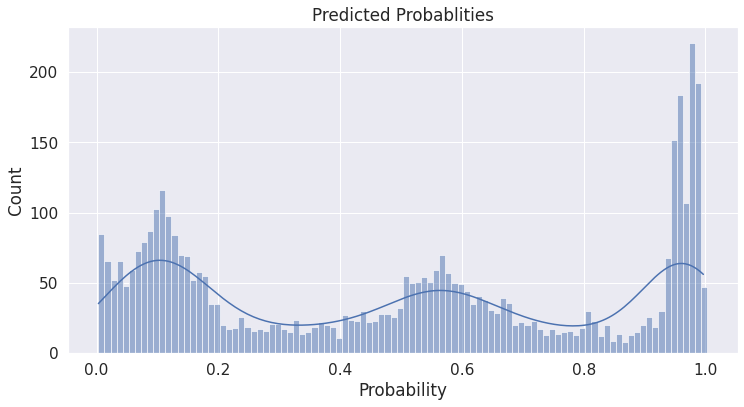

In [84]:
plt.figure(figsize = (12,6))
sns.histplot(preds , binwidth = 0.01 , kde = True)
plt.title('Predicted Probablities')
plt.xlabel('Probability')

**Post Processing**

Finally we will convert our probabilities to our desired data i.e. transported - True or not transported - False.The simplest way is to round each probability to the nearest integer. However, assuming the train and test sets have similar distributions, we can tune the classification threshold to obtain a similar proportion of transported/not transported in our predictions as in the train set. Remember that the proportion of transported passengers in the train set was 50.4%.

In [85]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds) , 2))

53.0


Our model is predicting that 53% of the passengers of the testing dataset will get transported but it is slightly more than 50.4% of the training dataset. We will try to bring this percentage a little bit.

Optimal Threshold :  0.461


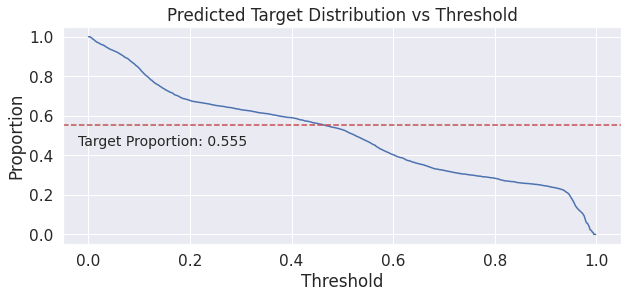

In [86]:
#Proportion of predicted transported classes
def preds_prop(preds_arr , thresh):
    pred_classes = (preds_arr >= thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

#Plot Proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    #Array of thresholds
    T_array = np.arange(0,1,0.001)
    
    #Calculate proportions
    prop = np.zeros(len(T_array))
    for i , T in enumerate(T_array):
        prop[i] = preds_prop(preds_arr , T)
        
    #Plot Proportions
    plt.figure(figsize = (10,4))
    plt.plot(T_array , prop)
    target_prop = 0.555
    plt.axhline(y = target_prop , color = 'r' , linestyle = '--')
    plt.text(-0.02 , 0.45 , f'Target Proportion: {target_prop}' , fontsize = 14)
    plt.title('Predicted Target Distribution vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    #Finding Optimal Threshold
    T_opt = T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal Threshold : ' , T_opt)
    return T_opt 

T_opt = plot_preds_prop(preds)
    

In [87]:
#Classifying test using Optimal Threshold
preds_tuned = (preds >= T_opt).astype(int)

**Submitting Predictions**

Text(0.5, 1.0, 'Prediction Distribution')

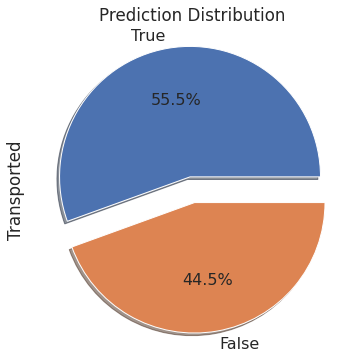

In [88]:
#Sample Submission (to get right format)
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

#Adding Predictions
sub['Transported'] = preds_tuned

#Replacing 0 to False and 1 to True
sub = sub.replace({0: False , 1: True})

#Prediction Distribution
plt.figure(figsize = (6,6))
sub['Transported'].value_counts().plot.pie(explode = [0.1 , 0.1], autopct = '%1.1f%%' , shadow = True, textprops = {'fontsize':16}).set_title('Prediction Distribution')



We can see here that my models are predicting that 55.5% of the passengers in the test dataset are going to be transported.

In [89]:
#Output to csv
sub.to_csv('submission_csv' , index = False)

Thank You if you have come this far. If you find this notebook interesting please upvote that will motivate me to make more notbooks like this. I hope this notebook will be helpful to you.


**REFERENCES**
https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide



**THANK YOU**

